# Bayesian probability

https://en.wikipedia.org/wiki/Bayesian_probability

[*********************100%***********************]  1 of 1 completed


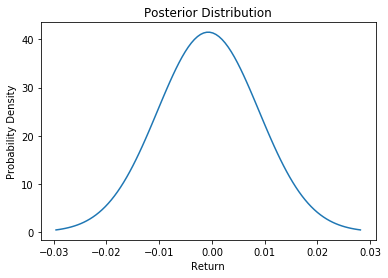

Estimated Posterior Mean: -0.0007062630242561811
Estimated Posterior Standard Deviation: 0.009614904650716578
Probability of Positive Return: 47.07%


In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

# Calculate daily returns
returns = np.diff(data) / data[:-1]

# Assume returns follow a normal distribution
mean_return = np.mean(returns)
std_deviation = np.std(returns)

# Define a prior belief about future returns (you can adjust this as needed)
prior_mean = 0.001  # Your prior belief about the mean return
prior_std = 0.01    # Your prior belief about the standard deviation of returns

# Bayesian update with new data (e.g., for the next day)
new_data = np.random.normal(mean_return, std_deviation)  # Simulated new data point
posterior_mean = (prior_mean / prior_std**2 + new_data / std_deviation**2) / (1 / prior_std**2 + 1 / std_deviation**2)
posterior_std = np.sqrt(1 / (1 / prior_std**2 + 1 / std_deviation**2))

# Calculate the probability of a positive return for the next day
probability_positive_return = 1 - stats.norm.cdf(0, loc=posterior_mean, scale=posterior_std)

# Plot the posterior distribution
x = np.linspace(posterior_mean - 3 * posterior_std, posterior_mean + 3 * posterior_std, 100)
y = stats.norm.pdf(x, loc=posterior_mean, scale=posterior_std)
plt.plot(x, y)
plt.title("Posterior Distribution")
plt.xlabel("Return")
plt.ylabel("Probability Density")
plt.show()

print(f"Estimated Posterior Mean: {posterior_mean}")
print(f"Estimated Posterior Standard Deviation: {posterior_std}")
print(f"Probability of Positive Return: {probability_positive_return:.2%}")